In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2


In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 5000)

# SMM4H21

In [3]:
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train.csv')
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv')
smm4h21_train

,term,start,end,text,code,STR,SNMS
0,see) straight,69,82,@wee_jendo nicotine lozenges. if i go cold tur...,10047508,Vision abnormal,"['Abnormal vision', 'Abnormal vision', 'Proble..."
1,withdrawals,21,32,i'm having the worst withdrawals from my parox...,10073281,Withdrawal symptom,"['Withdrawal symptom', 'Withdrawal complaint',..."
2,lose my temper,55,69,@icedweller i loved fluoxetine (prozac) but it...,10010085,Combative reaction,[]
3,lethargy,96,104,#seb2013 fluoxetine - prosac - reduces anxiety...,10024262,Lethargic,"['Lethargy', 'Lethargy', 'Lethargy', 'Lethargi..."
4,no sleep,127,135,@OisEucalypt I was on muscle relaxant Baclofen...,10041017,Sleeplessness,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
...,...,...,...,...,...,...,...
1364,withdrawal,60,70,@gromkath it's all training injuries. 3 of the...,10073281,Withdrawal symptom,"['Withdrawal symptom', 'Withdrawal complaint',..."
1365,zombie-ness,27,38,@glass1ncision -nods- my zombie-ness when i ...,10016384,Felt like a zombie,[]
1366,gorked,69,75,yay mom's giving me baclofen when i get home~ ...,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno..."
1367,depressed,44,53,i used to be on paxil but that made me more de...,10012378,Depression,"['Depression', 'Depression, NOS', 'Depression ..."


In [4]:
smm4h21_test

,term,start,end,text,code,STR,SNMS
0,brain zaps,129,139,"narcotic, benzo, etc rx's arent the only meds ...",10014358,Electric shock sensation,[]
1,falling asleep,75,89,@lucilleparr i take quetiapine and it's suppos...,10041014,Sleepiness,"['Drowsiness', 'Drowsiness', 'Sleepiness', 'Sl..."
2,lung issues,127,138,@crohniecharlie #humira helped my #crohns but ...,10025082,Lung disorder,"['Lung diseases', 'Disease of lung, NOS', 'Lun..."
3,Respiratory issues,52,70,@crohniecharlie #humira helped my #crohns but ...,10038683,Respiratory disorder,"['Respiratory disorder', 'Respiratory disorder..."
4,joint pain,63,73,but i have realised that it's the lamotrigine ...,10023222,Joint pain,"['Arthralgia', 'Arthralgia', 'Arthralgia', 'Ar..."
...,...,...,...,...,...,...,...
338,wired,7,12,fuckin wired! not sleeping tonight. #vyvanse #...,10041017,Sleeplessness,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."
339,addicted,31,39,i wish everyone i loved wasn't addicted to nic...,10056478,Nicotine addiction,"['Nicotine dependence', 'Nicotine dependence (..."
340,toxicity,68,76,ain't nothing worse than having vasovagal pre-...,10013746,Drug toxicity,"['Drug toxicity', 'Drug poisoning', 'Drug pois..."
341,lucid dreaming,67,81,act now and get our deluxe cyde-fx set absolut...,10079069,Lucid dreams,[]


In [5]:
smm4h21_train = smm4h21_train.dropna(axis=1)
smm4h21_train['code'] = smm4h21_train['code'].astype("int64")
smm4h21_train['span_len'] = smm4h21_train.apply(lambda x: x['end']-x['start'], axis=1)

smm4h21_test = smm4h21_test.dropna(axis=1)
smm4h21_test['code'] = smm4h21_test['code'].astype("int64")
smm4h21_test['span_len'] = smm4h21_test.apply(lambda x: x['end']-x['start'], axis=1)

In [6]:
smm4h21_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   term      1369 non-null   object
 1   start     1369 non-null   int64 
 2   end       1369 non-null   int64 
 3   text      1369 non-null   object
 4   code      1369 non-null   int64 
 5   STR       1369 non-null   object
 6   SNMS      1369 non-null   object
 7   span_len  1369 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 85.7+ KB


In [7]:
smm4h21_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   term      343 non-null    object
 1   start     343 non-null    int64 
 2   end       343 non-null    int64 
 3   text      343 non-null    object
 4   code      343 non-null    int64 
 5   STR       343 non-null    object
 6   SNMS      343 non-null    object
 7   span_len  343 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 21.6+ KB


<AxesSubplot:xlabel='code', ylabel='Count'>

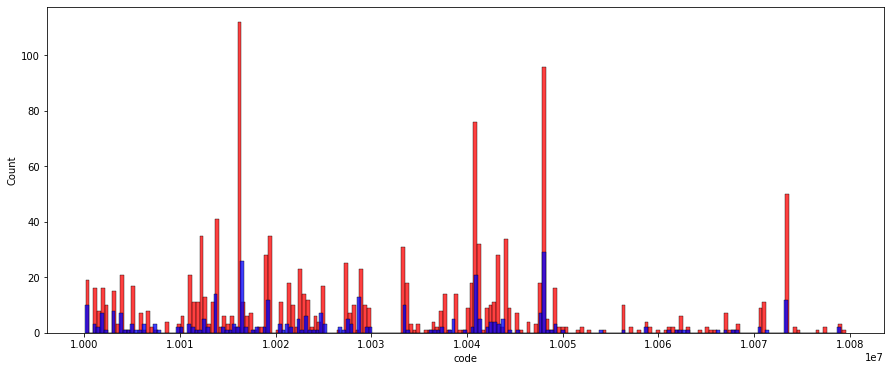

In [8]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h21_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')

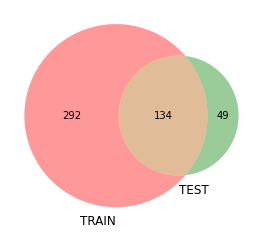

In [9]:
train_labels = set(smm4h21_train['code'].unique())
test_labels = set(smm4h21_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [10]:
smm4h21_train['code'] = smm4h21_train['code'].astype("category")
smm4h21_train.describe(include='all')

,term,start,end,text,code,STR,SNMS,span_len
count,1369,1369.000000,1369.000000,1369,1369.0,1369,1369,1369.000000
unique,938,NaN,NaN,1047,426.0,426,282,NaN
top,withdrawal,NaN,NaN,"09.26 day 12 rivaroxaban diary: headache, rig...",10073281.0,Withdrawal symptom,[],NaN
freq,34,NaN,NaN,7,50.0,50,265,NaN
mean,NaN,59.967129,71.648649,NaN,NaN,NaN,NaN,11.681519
std,NaN,33.406296,33.754813,NaN,NaN,NaN,NaN,7.611027
min,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,3.000000
25%,NaN,33.000000,45.000000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,58.000000,69.000000,NaN,NaN,NaN,NaN,10.000000
75%,NaN,85.000000,97.000000,NaN,NaN,NaN,NaN,14.000000


In [11]:
smm4h21_test.describe(include='all')

,term,start,end,text,code,STR,SNMS,span_len
count,343,343.000000,343.000000,343,3.430000e+02,343,343,343.000000
unique,267,NaN,NaN,317,NaN,183,130,NaN
top,withdrawal,NaN,NaN,"Cymbalta is legal, an antidepressant.....side ...",NaN,Withdrawal symptom,[],NaN
freq,12,NaN,NaN,3,NaN,12,67,NaN
mean,NaN,55.341108,67.005831,NaN,1.002907e+07,NaN,NaN,11.664723
std,NaN,32.890350,33.678997,NaN,1.921182e+04,NaN,NaN,7.265323
min,NaN,0.000000,7.000000,NaN,1.000008e+07,NaN,NaN,2.000000
25%,NaN,29.000000,40.000000,NaN,1.001460e+07,NaN,NaN,7.000000
50%,NaN,52.000000,62.000000,NaN,1.002508e+07,NaN,NaN,10.000000
75%,NaN,77.500000,92.500000,NaN,1.004287e+07,NaN,NaN,14.000000


# SMM4H17

In [12]:
smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train.csv')
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv')

smm4h17_train['code'] = smm4h17_train['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_train[smm4h17_train['code'].isna()].shape)
smm4h17_train = smm4h17_train[~smm4h17_train['code'].isna()]

smm4h17_test['code'] = smm4h17_test['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_test[smm4h17_test['code'].isna()].shape)
smm4h17_test = smm4h17_test[~smm4h17_test['code'].isna()]
smm4h17_train

(0, 4)
(0, 4)


,term,code,STR,SNMS
0,addict,10013663,Drug dependence,"['Drug dependence', 'Drug dependence', 'Drug d..."
1,allergic reaction,10020751,Hypersensitivity,"['Hypersensitivity', 'Hypersensitivity', 'Hype..."
2,pre-cutting,10022524,Intentional self-injury,[]
3,withdrawals,10048010,Withdrawal syndrome,[]
4,delirious,10012218,Delirium,"['Delirium', 'Delirium', 'Delirium', 'Delirium..."
...,...,...,...,...
6645,sedation,10039897,Sedation,"['Sedated state', 'Sedated', 'Under sedation',..."
6646,zombie,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno..."
6647,hallucinations,10019063,Hallucination,"['Hallucinations', 'Hallucinations', 'Hallucin..."
6648,not go to sleep,10022437,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn..."


In [13]:
smm4h17_test

,term,code,STR,SNMS
0,sleepier,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."
1,dreamt colors,10000125,Abnormal dreams,"['Dream disorder', 'Abnormal dreams', 'Abnorma..."
2,zombie,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno..."
3,headache,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
4,crazy,10061920,Psychotic disorder,"['Psychotic disorder, NOS', 'Psychotic disorde..."
...,...,...,...,...
2494,sleptwalk,10041347,Somnambulism,"['Somnambulism', 'Somnambulism', 'Somnambulism..."
2495,fatigue,10016256,Fatigue,"['Fatigue', 'Fatigue', 'Fatigue', 'Tiredness',..."
2496,headache,10019211,Headache,"['Headache', 'Headache', 'Headache', 'Headache..."
2497,out of it,10041349,Somnolence,"['Somnolence', 'Somnolence', 'Somnolence', 'So..."


<AxesSubplot:xlabel='code', ylabel='Count'>

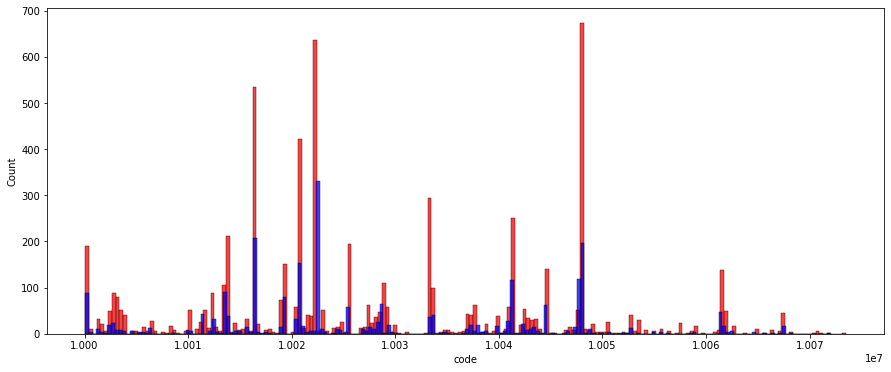

In [14]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h17_test['code'], bins=bins, color='blue')

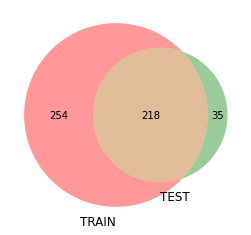

In [15]:
train_labels = set(smm4h17_train['code'].unique())
test_labels = set(smm4h17_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

# Compare SMM4h 17 and 21

In [16]:
smm4h_train = pd.concat([smm4h21_train, smm4h17_train], axis=0)
smm4h_test = pd.concat([smm4h21_test, smm4h17_test], axis=0)

smm4h_train.shape, smm4h_test.shape

((8019, 8), (2842, 8))

In [17]:
smm4h_train

,term,start,end,text,code,STR,SNMS,span_len
0,see) straight,69.0,82.0,@wee_jendo nicotine lozenges. if i go cold tur...,10047508,Vision abnormal,"['Abnormal vision', 'Abnormal vision', 'Proble...",13.0
1,withdrawals,21.0,32.0,i'm having the worst withdrawals from my parox...,10073281,Withdrawal symptom,"['Withdrawal symptom', 'Withdrawal complaint',...",11.0
2,lose my temper,55.0,69.0,@icedweller i loved fluoxetine (prozac) but it...,10010085,Combative reaction,[],14.0
3,lethargy,96.0,104.0,#seb2013 fluoxetine - prosac - reduces anxiety...,10024262,Lethargic,"['Lethargy', 'Lethargy', 'Lethargy', 'Lethargi...",8.0
4,no sleep,127.0,135.0,@OisEucalypt I was on muscle relaxant Baclofen...,10041017,Sleeplessness,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn...",8.0
...,...,...,...,...,...,...,...,...
6645,sedation,NaN,NaN,NaN,10039897,Sedation,"['Sedated state', 'Sedated', 'Under sedation',...",NaN
6646,zombie,NaN,NaN,NaN,10016322,Feeling abnormal,"['Feeling abnormal', 'Abnormal feeling', 'Abno...",NaN
6647,hallucinations,NaN,NaN,NaN,10019063,Hallucination,"['Hallucinations', 'Hallucinations', 'Hallucin...",NaN
6648,not go to sleep,NaN,NaN,NaN,10022437,Insomnia,"['Sleeplessness', 'Sleeplessness', 'Sleeplessn...",NaN


<AxesSubplot:xlabel='code', ylabel='Count'>

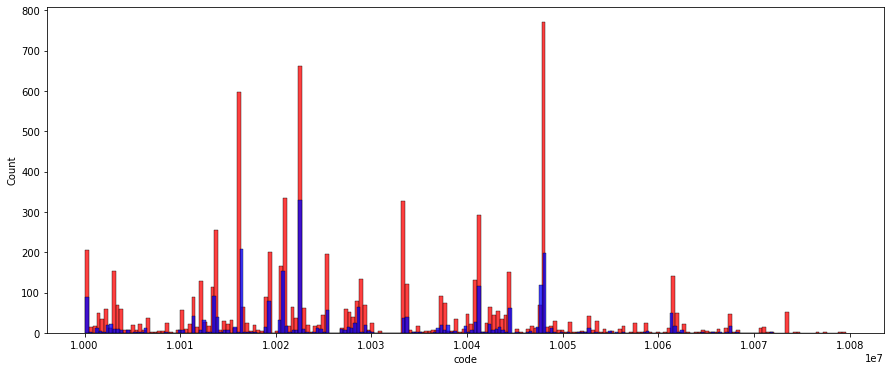

In [18]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h17_test['code'], bins=bins, color='blue')

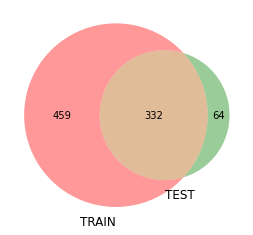

In [19]:
train_labels = set(smm4h_train['code'].unique())
test_labels = set(smm4h_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [20]:
smm4h_train['code'] = smm4h_train['code'].astype("category")
smm4h_train.describe(include='all')

,term,start,end,text,code,STR,SNMS,span_len
count,8019,1369.000000,1369.000000,1369,8019.0,8019,8019,1369.000000
unique,3032,NaN,NaN,1047,791.0,791,535,NaN
top,withdrawal,NaN,NaN,"09.26 day 12 rivaroxaban diary: headache, rig...",10022437.0,Insomnia,[],NaN
freq,260,NaN,NaN,7,656.0,656,906,NaN
mean,NaN,59.967129,71.648649,NaN,NaN,NaN,NaN,11.681519
std,NaN,33.406296,33.754813,NaN,NaN,NaN,NaN,7.611027
min,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN,3.000000
25%,NaN,33.000000,45.000000,NaN,NaN,NaN,NaN,7.000000
50%,NaN,58.000000,69.000000,NaN,NaN,NaN,NaN,10.000000
75%,NaN,85.000000,97.000000,NaN,NaN,NaN,NaN,14.000000


# CADEC

In [30]:
cadec_train = pd.read_csv('../../data/interim/cadec/train.csv')
cadec_test = pd.read_csv('../../data/interim/cadec/test.csv')
cadec_train

,term,start,end,sent,text,code,STR,SNMS
0,Sight loss,173,183,Have a 5 month supply but getting off quick!.,"slurring in speech, lower back pain, bloated, ...",10047571,Visual impairment,"['Visual impairment', 'Visual impairment', 'Vi..."
1,gas pains in abdomen,47,54,It lowered my LDL (not enough) but also lowere...,Terrific cramps in legs and awful gas pains in...,10016767,"Flatulence, eructation, and gas pain","['Flatulence, eructation and gas pain', '[D]Fl..."
2,knees hurt,692,696,Doctor is PISSED-----I'M THRILLED !!!.,Over the course of the past year I've experien...,10023477,Knee pain,"['Knee pain', 'Knee pain', 'Knee pain', 'Knee ..."
3,EXTREME nausea,497,511,vomitting - I have to fight to not throw up I ...,vomitting - I have to fight to not throw up I ...,10028813,Nausea,"['Nausea', 'Nausea', 'Nausea', 'Nausea', 'Naus..."
4,frequently unable to think clearly,110,144,"So far my blood tests have been normal, but no...","After three months on Lipitor, I started to fe...",10012805,Difficulty thinking,[]
...,...,...,...,...,...,...,...,...
3515,joint stiffness,21,36,I didn't realize this was the cause until I re...,"Headaches,body aches,joint stiffness,bloating,...",10023230,Joint stiffness,"['Joint stiffness', 'Joint stiffness NOS', 'Jo..."
3516,gas,1244,1247,He took Tums to alliviate stomach upsets and a...,I used to take Provachol (sp?)but I found it c...,10016766,Flatulence,"['Flatulence', 'Flatulence', 'Flatulence', 'Fl..."
3517,stomach pain,424,436,Now I have to see my doctor again to see if I ...,"For the first 8 days of ever taking it, the on...",10042076,Stomach ache,"['Stomach ache', 'Stomach ache', 'Belly ache',..."
3518,Severe elbow pain,31,35,"Severe elbow, arm and shoulder pain.","Severe elbow, arm and shoulder pain.<SENT>It's...",10033371,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."


In [22]:
cadec_train.shape, cadec_test.shape, 

((3520, 8), (881, 8))

<AxesSubplot:xlabel='code', ylabel='Count'>

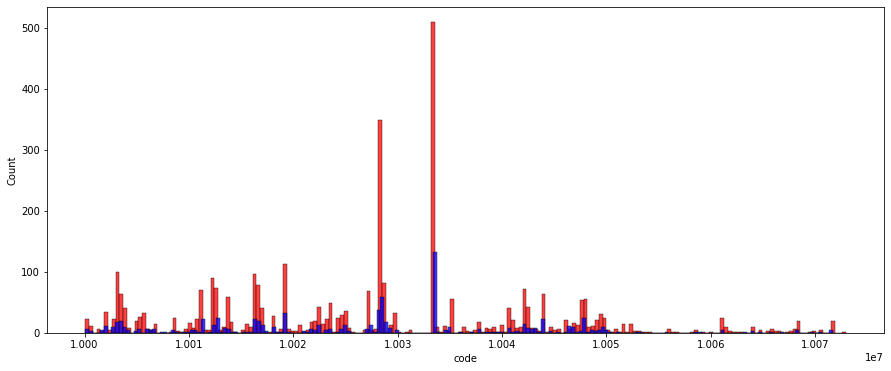

In [23]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=cadec_train['code'], bins=bins, color='red')
sns.histplot(data=cadec_test['code'], bins=bins, color='blue')

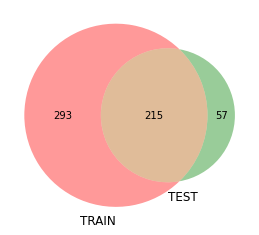

In [24]:
train_labels = set(cadec_train['code'].unique())
test_labels = set(cadec_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [25]:
cadec_train['code'] = cadec_train['code'].astype("category")
cadec_train.describe(include='all')

,term,start,end,sent,text,code,STR,SNMS
count,3520,3520.000000,3520.000000,3520,3520,3520.0,3520,3520
unique,2175,NaN,NaN,3470,1027,508.0,508,417
top,pain,NaN,NaN,.,I had been taking Lipitor 10mg for 2 years.<SE...,10033371.0,Pain,"['Pain', 'Pain', 'Pain', 'Pain', 'Pain', 'Pain..."
freq,102,NaN,NaN,12,25,298.0,298,298
mean,NaN,167.677273,180.999716,NaN,NaN,NaN,NaN,NaN
std,NaN,235.536819,235.606794,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,28.750000,41.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,87.000000,101.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,212.250000,227.000000,NaN,NaN,NaN,NaN,NaN


# PsyTar

In [31]:
psytar_train = pd.read_csv('../../data/interim/psytar/train.csv')
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv')
psytar_train

,term,start,end,sent_idx,text,norm_form,code,STR,SNMS
0,jaw clenching,16.0,29.0,1,weight gain and jaw clenching.<SENT>The first ...,Clenching teeth,10057326.0,Teeth clenching,"['Clenching teeth', 'Clenching of teeth', 'Den..."
1,little sleepy at first,0.0,22.0,1,"little sleepy at first, then dosage was increa...",Drowsiness,10013649.0,Drowsiness,"['Drowsiness', 'Drowsiness', 'Sleepiness', 'Sl..."
2,raging maniac,14.0,27.0,1,"turned into a raging maniac, i had nausea, col...",Manic mood,10026752.0,Manic,"['Manic mood', 'Manic mood', 'Manic', 'Manic m..."
3,dry mouth in the first week,303.0,330.0,4,Loss of appetite and weight (5 lbs in a month)...,Xerostomia,10013781.0,Dry mouth,"['Xerostomia', 'Xerostomia', 'Xerostomia', 'As..."
4,sweating really bugged me,310.0,335.0,4,"Shakes, sweating, difficulty sleeping, diarrhe...",Increased sweating,10019362.0,Heavy sweating,"['Increased sweating', 'Diaphoresis', 'Diaphor..."
...,...,...,...,...,...,...,...,...,...
3187,sleeping a lot,0.0,14.0,1,"sleeping a lot, low energy, sometimes hungry s...",Hypersomnia,10020765.0,Hypersomnia,"['Hypersomnia', 'Hypersomnia, NOS', 'Hypersomn..."
3188,rapid heart beat,149.0,165.0,4,Occasional dryness of mouth & constipation at ...,Tachycardia,10019303.0,Heart rate increased,"['Tachycardia', 'Tachycardia', 'Tachycardia, N..."
3189,wanted to kill myself several times,167.0,202.0,2,"Horrible headaches, brain ""swishes"" or ""zappin...",Feeling suicidal (finding),10042458.0,Suicidal ideation,"['Feeling suicidal (finding)', 'Suicidal ideat..."
3190,"nausea at first, subsided",NaN,NaN,1,"nausea at first, which subsided after a couple...",Nausea,10028813.0,Nausea,"['Nausea', 'Nausea', 'Nausea', 'Nausea', 'Naus..."


In [33]:
psytar_train.shape, psytar_test.shape

((3192, 9), (798, 9))

<AxesSubplot:xlabel='code', ylabel='Count'>

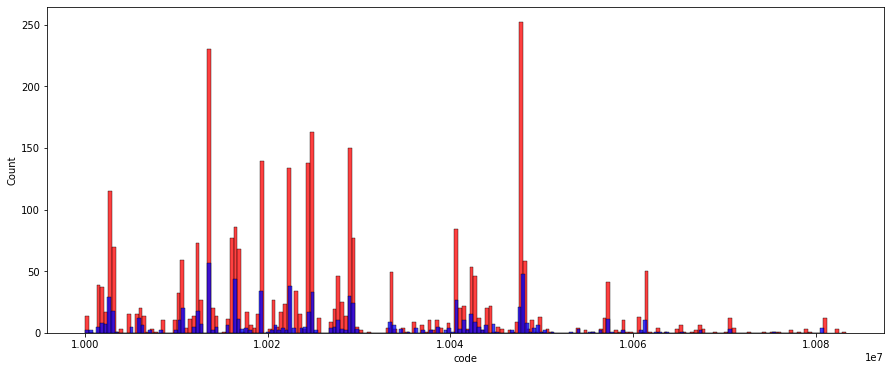

In [27]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=psytar_train['code'], bins=bins, color='red')
sns.histplot(data=psytar_test['code'], bins=bins, color='blue')

# Compare TRAIN SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

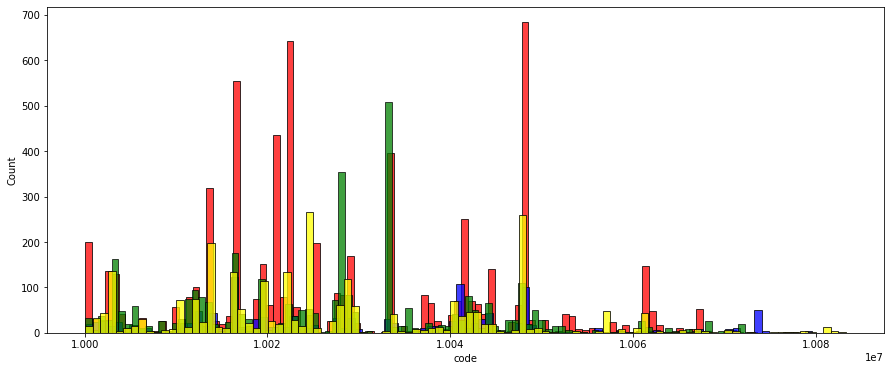

In [28]:
# smm4h17_train
# smm4h21_train
# cadec_train
# psytar_train

smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train.csv').dropna()
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train.csv').dropna()
cadec_train = pd.read_csv('../../data/interim/cadec/train.csv').dropna()
psytar_train = pd.read_csv('../../data/interim/psytar/train.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_train['code'], bins=bins, color='blue')
sns.histplot(data=cadec_train['code'], bins=bins, color='green')
sns.histplot(data=psytar_train['code'], bins=bins, color='yellow')

# Compare TEST SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

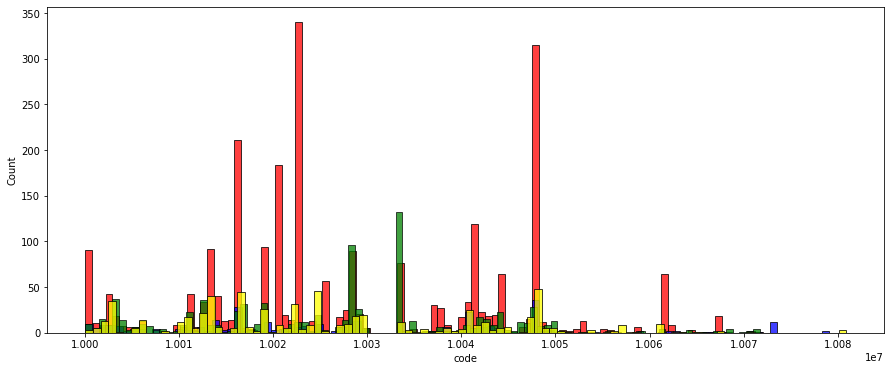

In [29]:
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv').dropna()
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv').dropna()
cadec_test= pd.read_csv('../../data/interim/cadec/test.csv').dropna()
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_test['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')
sns.histplot(data=cadec_test['code'], bins=bins, color='green')
sns.histplot(data=psytar_test['code'], bins=bins, color='yellow')